In [1]:
from BNReasoner import BNReasoner
import pandas as pd
from ordering import Ordering

In [2]:
NETWORK = "testing/dog_problem.BIFXML"

In [3]:
reasoner = BNReasoner(net=NETWORK)

In [4]:
reasoner.bn.get_edges_ingoing_to_var(variable="dog-out")

[('bowel-problem', 'dog-out'), ('family-out', 'dog-out')]

In [5]:
reasoner.bn.get_edges_outgoing_to_var(variable="dog-out")

[('dog-out', 'hear-bark')]

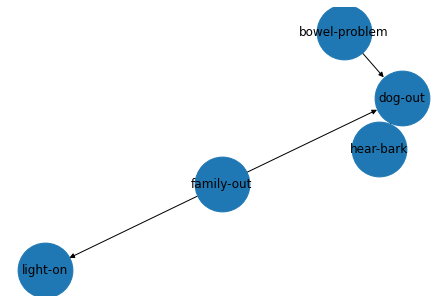

In [6]:
reasoner.bn.draw_structure()

In [7]:
from d_separation import DSeparated
import networkx as nx 

In [8]:
d_seperator = DSeparated()

In [9]:
orderer = Ordering()
X = ["light-on", "dog-out"]

orderer.min_degree(
    bn = reasoner.bn,
    X = X
)

Graph with 5 nodes and 5 edges


NetworkXError: The node light-on is not in the graph.

In [16]:
nx.d_separated(G=reasoner, x="family-out", y= "hear-bark", z= "dog-out")

AttributeError: 'BNReasoner' object has no attribute 'is_directed'

In [9]:
X = set(["bowel-problem"])
Y = set(["dog-out"])
Z = set(["hear-bark"])


d_seperator.d_separated(
    bayesNet = reasoner.bn,
    X = X,
    Y = Y,
    Z = Z
)

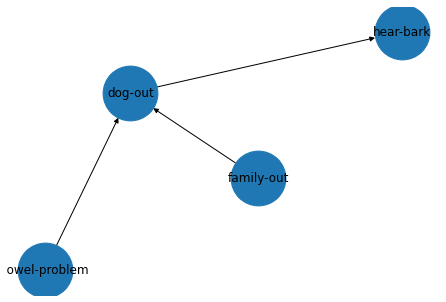

In [10]:
d_seperator.bayesNet.draw_structure()

In [5]:
reasoner.bn.get_edges()

OutEdgeView([('bowel-problem', 'dog-out'), ('dog-out', 'hear-bark'), ('family-out', 'light-on'), ('family-out', 'dog-out')])

In [10]:
list(reasoner.bn.structure.predecessors('dog-out'))

['bowel-problem', 'family-out']

In [12]:
list(reasoner.bn.structure.successors('family-out'))

['dog-out']

In [6]:
reasoner.bn.get_all_variables()

['light-on', 'bowel-problem', 'dog-out', 'hear-bark', 'family-out']

In [20]:
dog_out_CPT = reasoner.bn.get_cpt(variable="dog-out")

In [21]:
dog_out_CPT

,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
2,False,True,False,0.97
3,False,True,True,0.03
4,True,False,False,0.90
5,True,False,True,0.10
6,True,True,False,0.30
7,True,True,True,0.70


In [22]:
dog_out_CPT["family-out"]

0    False
1    False
2    False
3    False
4     True
5     True
6     True
7     True
Name: family-out, dtype: bool

In [23]:
dog_out_CPT["bowel-problem"]

0    False
1    False
2     True
3     True
4    False
5    False
6     True
7     True
Name: bowel-problem, dtype: bool

In [24]:
dog_out_CPT["family-out"] == dog_out_CPT["bowel-problem"]

0     True
1     True
2    False
3    False
4    False
5    False
6     True
7     True
dtype: bool

In [26]:
for row in dog_out_CPT.iterrows():
    print(row)

(0, family-out       False
bowel-problem    False
dog-out          False
p                 0.99
Name: 0, dtype: object)
(1, family-out       False
bowel-problem    False
dog-out           True
p                 0.01
Name: 1, dtype: object)
(2, family-out       False
bowel-problem     True
dog-out          False
p                 0.97
Name: 2, dtype: object)
(3, family-out       False
bowel-problem     True
dog-out           True
p                 0.03
Name: 3, dtype: object)
(4, family-out        True
bowel-problem    False
dog-out          False
p                  0.9
Name: 4, dtype: object)
(5, family-out        True
bowel-problem    False
dog-out           True
p                  0.1
Name: 5, dtype: object)
(6, family-out        True
bowel-problem     True
dog-out          False
p                  0.3
Name: 6, dtype: object)
(7, family-out       True
bowel-problem    True
dog-out          True
p                 0.7
Name: 7, dtype: object)
